<h1>HomeworkCh02_2</h1>

In [1]:
import sympy as sm
import numpy as np

x, y = sm.symbols('x,y')

f0=(x-1)*(x-10)*(y-1)*(y-10)*(x+12)*(y+12)
f0

(x - 10)*(x - 1)*(x + 12)*(y - 10)*(y - 1)*(y + 12)

In [2]:
f1=f0.diff(x)
f2=f0.diff(y)
f1,f2

((x - 10)*(x - 1)*(y - 10)*(y - 1)*(y + 12) + (x - 10)*(x + 12)*(y - 10)*(y - 1)*(y + 12) + (x - 1)*(x + 12)*(y - 10)*(y - 1)*(y + 12),
 (x - 10)*(x - 1)*(x + 12)*(y - 10)*(y - 1) + (x - 10)*(x - 1)*(x + 12)*(y - 10)*(y + 12) + (x - 10)*(x - 1)*(x + 12)*(y - 1)*(y + 12))

In [3]:
eq1=sm.Eq(f1,0)
eq2=sm.Eq(f2,0)
eq1,eq2

(Eq((x - 10)*(x - 1)*(y - 10)*(y - 1)*(y + 12) + (x - 10)*(x + 12)*(y - 10)*(y - 1)*(y + 12) + (x - 1)*(x + 12)*(y - 10)*(y - 1)*(y + 12), 0),
 Eq((x - 10)*(x - 1)*(x + 12)*(y - 10)*(y - 1) + (x - 10)*(x - 1)*(x + 12)*(y - 10)*(y + 12) + (x - 10)*(x - 1)*(x + 12)*(y - 1)*(y + 12), 0))

In [4]:
sol=sm.solve([eq1,eq2],x,y,
            dict=True,
            #simplify=True
            )
sol

[{x: -12, y: -12},
 {x: -12, y: 1},
 {x: -12, y: 10},
 {x: 1, y: -12},
 {x: 1, y: 1},
 {x: 1, y: 10},
 {x: 10, y: -12},
 {x: 10, y: 1},
 {x: 10, y: 10},
 {x: -1/3 + sqrt(367)/3, y: -1/3 + sqrt(367)/3},
 {x: -1/3 + sqrt(367)/3, y: -sqrt(367)/3 - 1/3},
 {x: -sqrt(367)/3 - 1/3, y: -1/3 + sqrt(367)/3},
 {x: -sqrt(367)/3 - 1/3, y: -sqrt(367)/3 - 1/3}]

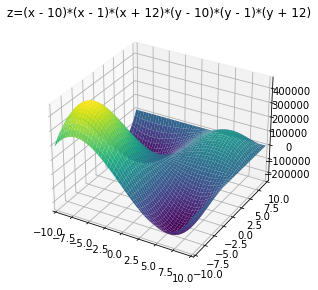

In [5]:
q=sm.plotting.plot3d(f0,
            (x,-10,10),(y,-10,10),
            xlable='x',
            ylable='y',
                    title=f'z={f0}')

In [6]:
len(sol)

13

In [7]:
from scipy.optimize import minimize
def f(x, sign=1):
    x1 = x[0]
    x2 = x[1]
    return sign*(x1-1)*(x1-10)*(x2-1)*(x2-10)*(x1+12)*(x2+12)

In [8]:
x0=np.concatenate((np.random.randn(2), [1.5]))
Result = minimize(f,x0)

In [9]:
Result.x

array([-6.71908119,  6.05241468,  1.5       ])

In [10]:
Result.fun

-245387.99999999977

In [11]:
f(Result.x)

-245387.99999999977

In [12]:
from __future__ import print_function # still using Python 2.7
import sympy

# create a symbolic variable for each symbol in our equation
y, x, k = sympy.symbols('y, x, k', real=True)

# define the equation y = kx - (1-k)x^2
fwd_equation = sympy.Eq(y, k*x - (k - 1)*x**2)

# solve the equation for x and print solutions
inverse = sympy.solve(fwd_equation, x)
print('found {} solutions for x:'.format(len(inverse)))
print('\n'.join([str(s) for s in inverse]))

found 2 solutions for x:
(k - sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))
(k + sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))


In [13]:
print(inverse[0].subs(k, 1.5).simplify())
print(inverse[0].subs(k, 1.375).simplify())

1.5 - 1.5*sqrt(1 - 0.888888888888889*y)
1.83333333333333 - 1.83333333333333*sqrt(1 - 0.793388429752066*y)


In [14]:
print('x =', sympy.latex(inverse[0]))

x = \frac{k - \sqrt{k^{2} - 4 k y + 4 y}}{2 \left(k - 1\right)}


In [15]:
from __future__ import print_function # still using Python 2.7
import sympy

# create some symbols for angles
p, q, r = sympy.symbols('p, q, r', real=True)

# create some symbols for unknown elements of lQ
x1, y1, z1 = sympy.symbols('x1, y1, z1')

# define vectors we know so far
P = sympy.Matrix([0, 0, 1])
lR = sympy.Matrix([1, 0, 0])
lQ = sympy.Matrix([x1, y1, z1])

lQ_equations = [
    sympy.Eq(lQ.dot(P), 0),              # lQ contains P
    sympy.Eq(lQ.dot(lR), -sympy.cos(p)), # angle at point P
    sympy.Eq(lQ.dot(lQ), 1)              # lQ is a unit vector
]

S = sympy.solve(lQ_equations, x1, y1, z1, dict=True, simplify=True)
print('found {} solutions for lQ:'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S])) # ask for pretty output

lQ = lQ.subs(S[1])
print('now lQ is {}'.format(lQ))

found 2 solutions for lQ:
{x₁: -cos(p), y₁: -│sin(p)│, z₁: 0}
{x₁: -cos(p), y₁: │sin(p)│, z₁: 0}
now lQ is Matrix([[-cos(p)], [Abs(sin(p))], [0]])


In [16]:
lQ = lQ.subs(sympy.Abs(sympy.sin(p)), sympy.sin(p))
print('after subbing out abs, lQ is {}'.format(lQ))

after subbing out abs, lQ is Matrix([[-cos(p)], [sin(p)], [0]])


In [17]:
print('checking our work:')
print('  lQ . P  =', lQ.dot(P))
print('  lQ . lR =', lQ.dot(lR))
print('  lQ . lQ =', lQ.dot(lQ))

checking our work:
  lQ . P  = 0
  lQ . lR = -cos(p)
  lQ . lQ = sin(p)**2 + cos(p)**2


In [18]:
print('  lQ . lQ =', lQ.dot(lQ).simplify())

  lQ . lQ = 1


In [19]:
x2, y2 = sympy.symbols('x2, y2')
z2 = sympy.sqrt(1 - x2**2 - y2**2)

lP = sympy.Matrix([x2, y2, z2])
print('||lP||^2 =', lP.dot(lP))

lP_equations = [
    sympy.Eq(lP.dot(lR), -sympy.cos(q)),
    sympy.Eq(lP.dot(lQ), -sympy.cos(r)),
]

S = sympy.solve(lP_equations, x2, y2, dict=True, simplify=True)
print('got {} solutions for lP'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S]))

lP = lP.subs(S[0])
print('now lP is {}'.format(lP))

||lP||^2 = 1
got 1 solutions for lP
⎧                 -(cos(p)⋅cos(q) + cos(r)) ⎫
⎨x₂: -cos(q), y₂: ──────────────────────────⎬
⎩                           sin(p)          ⎭
now lP is Matrix([[-cos(q)], [-(cos(p)*cos(q) + cos(r))/sin(p)], [sqrt(-(cos(p)*cos(q) + cos(r))**2/sin(p)**2 - cos(q)**2 + 1)]])


In [20]:
x = sympy.Symbol('x', real=True)
f = sympy.exp(-x**2 / 2) * sympy.cos(sympy.pi*x)

dfdx = f.diff(x) # <- yes, taking derivatives is this easy!

print("f'(x) =", sympy.latex(sympy.simplify(dfdx)))

f'(x) = - \left(x \cos{\left(\pi x \right)} + \pi \sin{\left(\pi x \right)}\right) e^{- \frac{x^{2}}{2}}


In [21]:
x, y = sympy.symbols('x, y', real=True)
g = sympy.exp(-(x**2 + y**2) / 2) * sympy.cos(sympy.pi*x)

for var in [x, y]:
    print("\\frac{\\partial g}{\\partial " + str(var) + "} =",
          sympy.latex(sympy.simplify(g.diff(var))))

\frac{\partial g}{\partial x} = - \left(x \cos{\left(\pi x \right)} + \pi \sin{\left(\pi x \right)}\right) e^{- \frac{x^{2}}{2} - \frac{y^{2}}{2}}
\frac{\partial g}{\partial y} = - y e^{- \frac{x^{2}}{2} - \frac{y^{2}}{2}} \cos{\left(\pi x \right)}


In [22]:
from __future__ import print_function
import sympy

x, y, u, v, h, s, t, l, rho, phi = sympy.symbols(
    'x, y, u, v, h, s, t, l, rho, phi', real=True)

cr = sympy.cos(rho)
sr = sympy.sin(rho)

xp =  (x - u) * cr + (y - v) * sr
yp = -(x - u) * sr + (y - v) * cr

f = ( h * sympy.exp(-xp**2 / (2*s**2) - yp**2 / (2*t**2) ) *
      sympy.cos( 2 * sympy.pi * xp / l + phi ) )

In [23]:
theta = (u, v, h, s, t, l, rho, phi)

for i, var in enumerate(theta):
    deriv = f.diff(var)
    print('grad[{}]'.format(i), '=', sympy.ccode(deriv) + ';')

grad[0] = h*(-((u - x)*sin(rho) + (-v + y)*cos(rho))*sin(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*cos(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*sin(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l)*cos(rho)/l;
grad[1] = h*(((u - x)*sin(rho) + (-v + y)*cos(rho))*cos(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*sin(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin

In [24]:
derivs = [ f.diff(var) for var in theta ]

variable_namer = sympy.numbered_symbols('sigma_')
replacements, reduced = sympy.cse(derivs, symbols=variable_namer)

for key, val in replacements:
    print('double', key, '=', sympy.ccode(val) + ';')

print()

for i, r in enumerate(reduced):
    print('grad[{}]'.format(i), '=', sympy.ccode(r) + ';')

double sigma_0 = cos(rho);
double sigma_1 = 2*sigma_0;
double sigma_2 = -u + x;
double sigma_3 = sin(rho);
double sigma_4 = -v + y;
double sigma_5 = sigma_3*sigma_4;
double sigma_6 = sigma_0*sigma_2 + sigma_5;
double sigma_7 = M_PI/l;
double sigma_8 = 2*sigma_7;
double sigma_9 = phi + sigma_6*sigma_8;
double sigma_10 = pow(s, -2);
double sigma_11 = pow(sigma_6, 2);
double sigma_12 = pow(t, -2);
double sigma_13 = u - x;
double sigma_14 = sigma_0*sigma_4;
double sigma_15 = sigma_13*sigma_3 + sigma_14;
double sigma_16 = pow(sigma_15, 2);
double sigma_17 = exp(-1.0/2.0*sigma_10*sigma_11 - 1.0/2.0*sigma_12*sigma_16);
double sigma_18 = h*sigma_17*sin(sigma_9);
double sigma_19 = sigma_10*sigma_6;
double sigma_20 = sigma_12*sigma_15;
double sigma_21 = sigma_17*cos(sigma_9);
double sigma_22 = h*sigma_21;
double sigma_23 = sigma_18*sigma_8;
double sigma_24 = sigma_2*sigma_3;

grad[0] = sigma_1*sigma_18*sigma_7 + sigma_22*(sigma_0*sigma_19 - sigma_20*sigma_3);
grad[1] = sigma_22*(sigma_0*sigma_20